# The Sparks Foundation

# Task-1  -  Prediction using Supervised ML 

By, Kavin V

Problem statement : Predict the percentage of an student based on the no. of study hours. What will be the predicted score if a student studies for 9.25hrs/day? 

In [1]:
# Necessary imports

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading of training dataset

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv";
train = pd.read_csv(url);

# Exploratory Data Analysis

In [3]:
#Getting basic info of training dataset

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [4]:
#Getting column info in training dataset

train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Figure size 360x360 with 0 Axes>

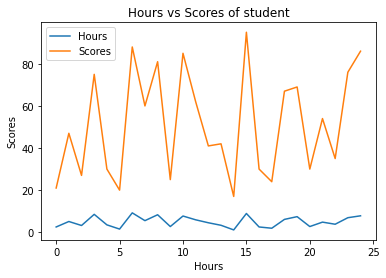

In [5]:
#Training data Visualization 

plt.figure(figsize=(5,5))
train.plot(kind="line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores of student")
plt.show()

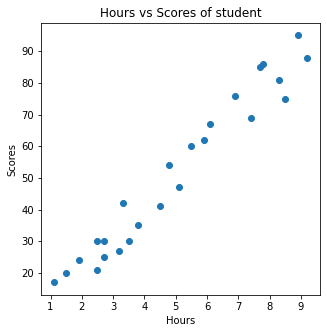

In [6]:
#Training data Visualization 

plt.figure(figsize=(5,5))
plt.scatter(x=train[["Hours"]],y=train[["Scores"]])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores of student")
plt.show()

# Preprocessing data for missing values

In [7]:
#checking for any missing values in dataset

train.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Extracting data for training

x = train[["Hours"]]
y = train[["Scores"]]

In [9]:
#Splitting data for out-of-sample scoring 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

# Training the model 

In [10]:
#Training the model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

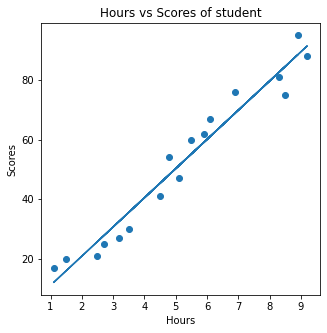

In [11]:
#plotting the regression line

line=model.coef_*x_train+model.intercept_

plt.figure(figsize=(5,5))
plt.scatter(x_train,y_train)
plt.plot(x_train,line)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores of student")
plt.show()

# Making Predictions

In [12]:
#predicting y-values of test set

y_predict = model.predict(x_test)

In [13]:
#Evaluating the model's performance

print(model.score(x_test,y_test))

0.9391488478760097


Note : This is not the original accuracy, here accuracy has high variance and it depends on the "random_state" Hyper-parameter.

These are some of the score values for different random_state hyper-parameter -> 0.88, 0.93, 0.94 ,0.93.
To get low variance accuracy we use mean of cross-val-score.

# Evaluating model performance

In [14]:
#Low variance accuracy using cross-val-score

Accuracy = cross_val_score(model,x,y,cv=5)
Accuracy.mean()

0.9180771341891051

In [15]:
#Mean Squares Error
from sklearn import metrics 

print("Mean Absolute Error : ",metrics.mean_absolute_error(y_predict,y_test))

Mean Absolute Error :  5.489294806376118


# Qn : What will be the predicted score if a student studies for 9.25hrs/day? 

In [16]:
model.predict([[9.25]])[0][0].round(2)

91.97

=====================================================Thank you=====================================================